Tutorial 1: Grids
=================

In this tutorial, we introduce two-dimensional grids of Cartesian $(y,x)$ coordinates, which represent the coordinates
of an observed data-set (e.g. imaging). In subsequent tutorials, we will use these grids to perform gravitational
lensing ray-tracing calculations.

Grids are defined in units of 'arc-seconds', if you are not familiar with this term it is the distance unit commonly
used by Astronomers. **PyAutoLens** automatically converts all grids from units of pixels to arc-seconds, so you should
simply get used to seeing distances displayed in arc seconds.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


__Grids__

In **PyAutoLens**, a `Grid2D` is a set of two-dimensional $(y,x)$ coordinates (in arc-seconds) that are deflected and 
traced by a strong lensing system.

The $(y,x)$ coordinates on the `Grid2D` are aligned with the image we analyze, such that each coordinate maps to the 
centre of each image-pixel. Lets make a `Grid2D` on a grid of 100 x 100 pixels, with a pixel scale (arcsecond-to-pixel 
conversion factor) of 0.05", giving us a 5" x 5" grid.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

First, lets plot this `Grid2D`, which shows that it is a fairly boring uniform `Grid2D` of dots.

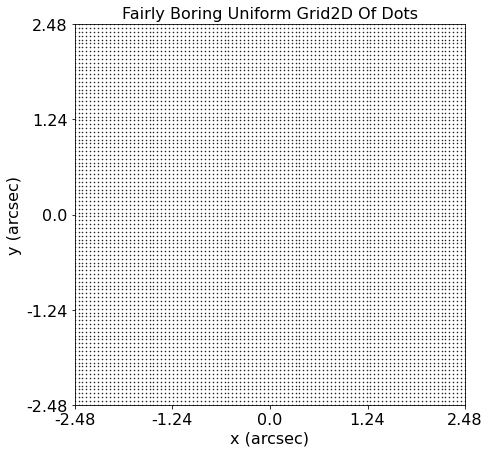

In [3]:
mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="Fairly Boring Uniform Grid2D Of Dots")
)

grid_plotter = aplt.Grid2DPlotter(grid=grid, mat_plot_2d=mat_plot_2d)
grid_plotter.figure_2d()

We can print each coordinate of this `Grid2D`, revealing that it consists of a set of arc-second coordinates (where the 
spacing between each coordinate corresponds to the `pixel_scales` of 0.05" defined above).

In [4]:
print("(y,x) pixel 0:")
print(grid.native[0, 0])
print("(y,x) pixel 1:")
print(grid.native[0, 1])
print("(y,x) pixel 2:")
print(grid.native[0, 2])
print("(y,x) pixel 100:")
print(grid.native[1, 0])
print("etc.")

(y,x) pixel 0:
[ 2.475 -2.475]
(y,x) pixel 1:
[ 2.475 -2.425]
(y,x) pixel 2:
[ 2.475 -2.375]
(y,x) pixel 100:
[ 2.425 -2.475]
etc.


__Data Structure__

Above, you may have noted that we use the `native` attribute of the grid to print its $(y,x)$ coordinates. Every 
`Grid2D` object is accessible via two attributes, `native` and `slim`, which store the grid as NumPy ndarrays of two 
different shapes:
 
 - `native`: an ndarray of shape [total_y_image_pixels, total_x_image_pixels, 2], which is the native shape of the 
 2D grid and corresponds to the resolution of the image datasets we pair with a grid.
 
 - `slim`: an ndarray of shape [total_y_image_pixels*total_x_image_pixels, 2] which is a slimmed-down representation 
 the grid which collapses the inner two dimensions of the native ndarray to a single dimension.

In [5]:
print("(y,x) pixel 0 (accessed via native):")
print(grid.native[0, 0])
print("(y,x) pixel 0 (accessed via slim 1D):")
print(grid.slim[0])

(y,x) pixel 0 (accessed via native):
[ 2.475 -2.475]
(y,x) pixel 0 (accessed via slim 1D):
[ 2.475 -2.475]


Currently, it is unclear where there is a need for a `slim` representation of the grid (as the native representation 
contains all the information about the grid in a structure that is more representative of the grid itself). This will 
become apparent  throughout the **HowToLens** lectures, so for now don't worry about it! 

The shapes of the `Grid2D` in its `native` and `slim` formats are also available, confirming that this grid has a 
`native` resolution of (100 x 100) and a `slim` resolution of 10000 coordinates.

In [6]:
print(grid.shape_native)
print(grid.shape_slim)

(100, 100)
10000


Note that neither of the shapes above include the third index of the `Grid` which has dimensions 2 (corresponding to 
the y and x coordinates). This is accessible by using the standard numpy `shape` method on each grid.

In [7]:
print(grid.native.shape)
print(grid.slim.shape)

(100, 100, 2)
(10000, 2)


We can print the entire `Grid2D` in its `slim` or `native` form. 

In [8]:
print(grid.native)
print(grid.slim)

[[[ 2.475 -2.475]
  [ 2.475 -2.425]
  [ 2.475 -2.375]
  ...
  [ 2.475  2.375]
  [ 2.475  2.425]
  [ 2.475  2.475]]

 [[ 2.425 -2.475]
  [ 2.425 -2.425]
  [ 2.425 -2.375]
  ...
  [ 2.425  2.375]
  [ 2.425  2.425]
  [ 2.425  2.475]]

 [[ 2.375 -2.475]
  [ 2.375 -2.425]
  [ 2.375 -2.375]
  ...
  [ 2.375  2.375]
  [ 2.375  2.425]
  [ 2.375  2.475]]

 ...

 [[-2.375 -2.475]
  [-2.375 -2.425]
  [-2.375 -2.375]
  ...
  [-2.375  2.375]
  [-2.375  2.425]
  [-2.375  2.475]]

 [[-2.425 -2.475]
  [-2.425 -2.425]
  [-2.425 -2.375]
  ...
  [-2.425  2.375]
  [-2.425  2.425]
  [-2.425  2.475]]

 [[-2.475 -2.475]
  [-2.475 -2.425]
  [-2.475 -2.375]
  ...
  [-2.475  2.375]
  [-2.475  2.425]
  [-2.475  2.475]]]
[[ 2.475 -2.475]
 [ 2.475 -2.425]
 [ 2.475 -2.375]
 ...
 [-2.475  2.375]
 [-2.475  2.425]
 [-2.475  2.475]]


__Wrap Up__

Congratulations, you`ve completed your first **PyAutoLens** tutorial! Before moving on to the next one, experiment with 
**PyAutoLens** by doing the following:

1) Change the pixel-scale of the `Grid2D`'s: what happens to the arc-second's grid of coordinates?
2) Change the resolution of the `Grid2D`'s: what happens to the arc-second's grid of coordinates?